In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import VimeoVideo
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df=pd.read_csv("BTC-INR.csv")

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-21,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
1,2022-12-22,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2,2022-12-23,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
3,2022-12-24,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
4,2022-12-25,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772
...,...,...,...,...,...,...,...
361,2023-12-17,3482587.500,3542976.000,3464764.500,3507697.750,3507697.750,1194700640600
362,2023-12-18,3507364.500,3517611.000,3427515.500,3434999.500,3434999.500,1385030792748
363,2023-12-19,3433632.250,3553216.000,3366190.000,3543232.500,3543232.500,2096887611657
364,2023-12-20,3544726.500,3604376.500,3475015.750,3512167.000,3512167.000,1925228609272


# Data Understanding

In [6]:
df.shape

(366, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02
mean,2.311335e+06,2.349220e+06,2.279962e+06,2.316767e+06,2.316767e+06,1.490194e+12
std,4.784350e+05,4.886451e+05,4.698631e+05,4.804021e+05,4.804021e+05,7.019874e+11
min,1.369664e+06,1.376154e+06,1.356638e+06,1.369630e+06,1.369630e+06,4.434339e+11
25%,2.125154e+06,2.151140e+06,2.072044e+06,2.131268e+06,2.131268e+06,9.951860e+11
50%,2.264114e+06,2.305964e+06,2.229954e+06,2.264076e+06,2.264076e+06,1.298566e+12
75%,2.467608e+06,2.499287e+06,2.437147e+06,2.470941e+06,2.470941e+06,1.868670e+12
max,3.685955e+06,3.730648e+06,3.639866e+06,3.684835e+06,3.684835e+06,4.495685e+12


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-21,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
1,2022-12-22,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2,2022-12-23,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
3,2022-12-24,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
4,2022-12-25,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-12-17,3482587.50,3542976.0,3464764.50,3507697.75,3507697.75,1194700640600
362,2023-12-18,3507364.50,3517611.0,3427515.50,3434999.50,3434999.50,1385030792748
363,2023-12-19,3433632.25,3553216.0,3366190.00,3543232.50,3543232.50,2096887611657
364,2023-12-20,3544726.50,3604376.5,3475015.75,3512167.00,3512167.00,1925228609272
365,2023-12-21,3634468.00,3680624.0,3604612.00,3613996.25,3613996.25,2053740298240


In [11]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-21,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
1,2022-12-22,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2,2022-12-23,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
3,2022-12-24,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
4,2022-12-25,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772
5,2022-12-26,1392479.750,1402731.750,1390870.500,1402705.375,1402705.375,985466364712
6,2022-12-27,1402662.750,1406026.250,1378261.750,1383756.750,1383756.750,1303581799925
7,2022-12-28,1383692.625,1388475.250,1366746.750,1371422.000,1371422.000,1408965912561
8,2022-12-29,1371401.250,1379199.500,1367794.625,1378579.375,1378579.375,1198817299816
9,2022-12-30,1378495.500,1378655.750,1356638.000,1373863.750,1373863.750,1318138039617


In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data Preprocessing

In [13]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False


In [18]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

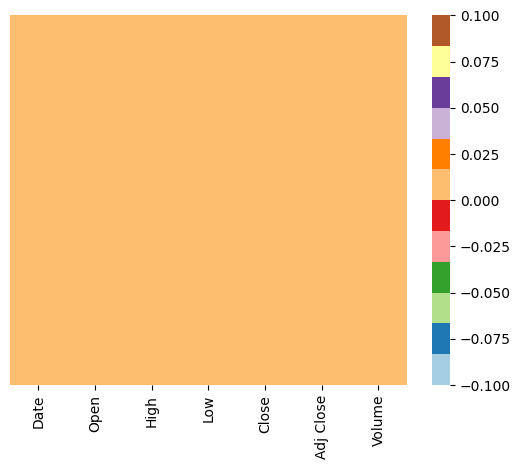

In [15]:
sns.heatmap(df.isna(),yticklabels=False,cmap='Paired')

In [16]:
np.array(df)

array([['2022-12-21', 1396942.0, 1397956.125, ..., 1393817.875,
        1393817.875, 1233481340162],
       ['2022-12-22', 1393888.0, 1395520.0, ..., 1394817.0, 1394817.0,
        1362597734113],
       ['2022-12-23', 1394759.125, 1400530.25, ..., 1387501.375,
        1387501.375, 1266263988861],
       ...,
       ['2023-12-19', 3433632.25, 3553216.0, ..., 3543232.5, 3543232.5,
        2096887611657],
       ['2023-12-20', 3544726.5, 3604376.5, ..., 3512167.0, 3512167.0,
        1925228609272],
       ['2023-12-21', 3634468.0, 3680624.0, ..., 3613996.25, 3613996.25,
        2053740298240]], dtype=object)

In [18]:
df.ndim

2

In [19]:
np.mean(df)

Open         2.311335e+06
High         2.349220e+06
Low          2.279962e+06
Close        2.316767e+06
Adj Close    2.316767e+06
Volume       1.490194e+12
dtype: float64

In [21]:
np.std(df)

Open         4.777810e+05
High         4.879771e+05
Low          4.692208e+05
Close        4.797454e+05
Adj Close    4.797454e+05
Volume       7.010277e+11
dtype: float64

In [22]:
np.var(df)

Open         2.282747e+11
High         2.381216e+11
Low          2.201681e+11
Close        2.301556e+11
Adj Close    2.301556e+11
Volume       4.914399e+23
dtype: float64

In [24]:
np.percentile(df['High'],25)

2151139.5

In [25]:
np.percentile(df['Open'],50)

2264113.5

In [26]:
np.percentile(df['Close'],75)

2470940.875

In [27]:
np.percentile(df['Close'],0.25)

1371265.1671875

In [28]:
np.quantile(df['Close'],0.50)

2264076.0

In [29]:
np.quantile(df['Close'],0.75)

2470940.875

In [31]:
from scipy import stats

stats.mode(df['Volume'],keepdims=True)

ModeResult(mode=array([2490465605070], dtype=int64), count=array([2]))

In [39]:
df.iloc[5]

Date           2022-12-26
Open           1392479.75
High           1402731.75
Low             1390870.5
Close         1402705.375
Adj Close     1402705.375
Volume       985466364712
Name: 5, dtype: object

# Exploratory Data Analysis

<Axes: xlabel='Open', ylabel='Count'>

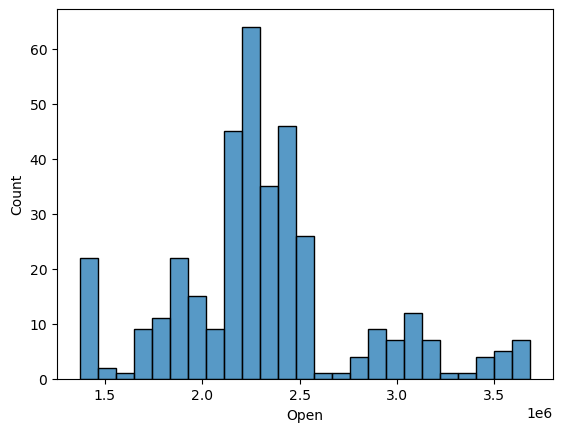

In [6]:
sns.histplot(df.Open)

<Axes: xlabel='Close', ylabel='Density'>

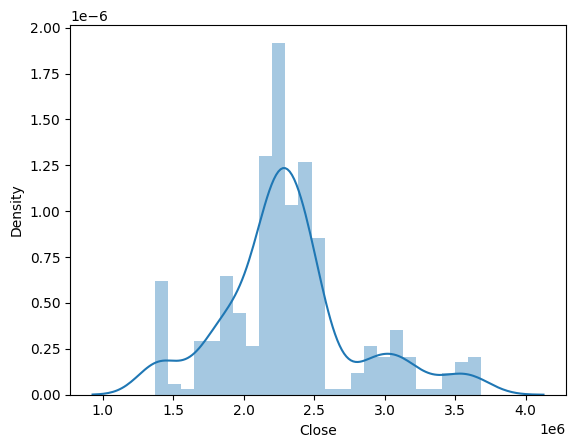

In [41]:
sns.distplot(df.Close)

<Axes: xlabel='Open', ylabel='Density'>

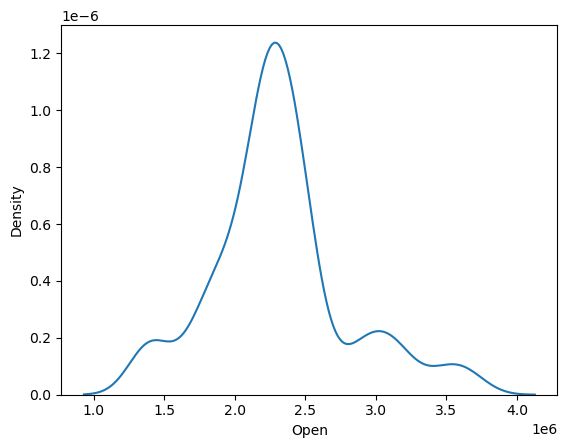

In [23]:
sns.kdeplot(df.Open)

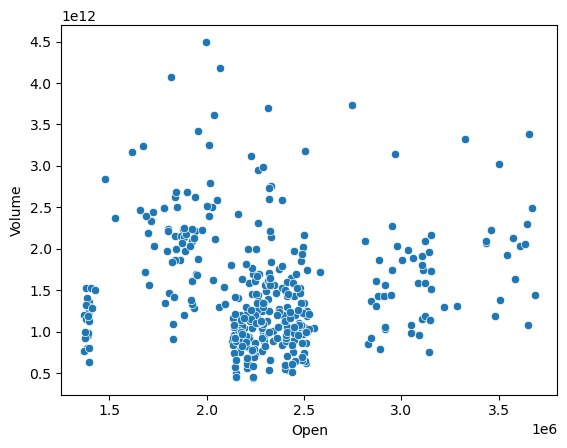

In [16]:
sns.scatterplot(x='Open',y='Volume',data=df)
plt.show()

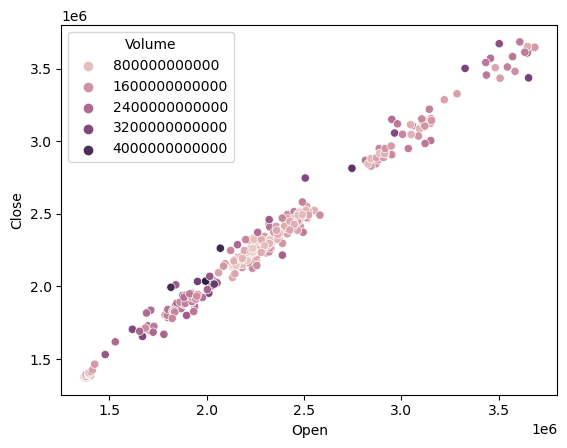

In [26]:
sns.scatterplot(x='Open',y='Close',data=df,hue='Volume')
plt.show()

<Axes: xlabel='Open', ylabel='Close'>

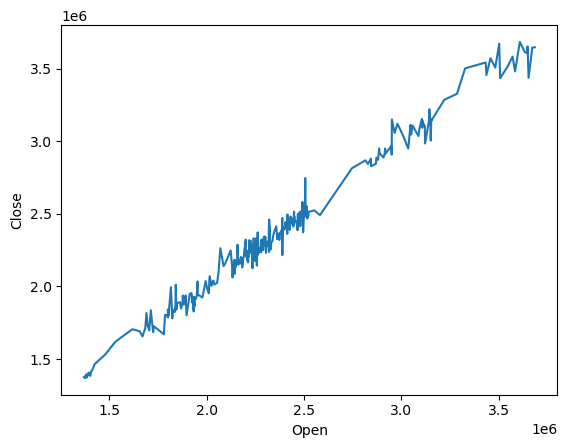

In [19]:
sns.lineplot(x='Open',y='Close',data=df)

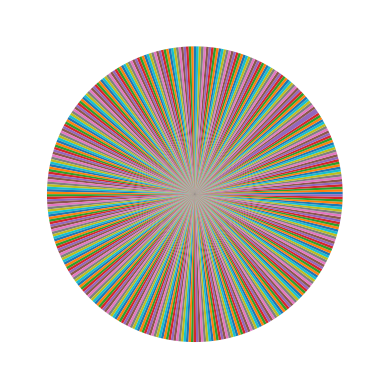

In [24]:
e=df.groupby('Open')['Open'].count()
plt.pie(e)
plt.show()

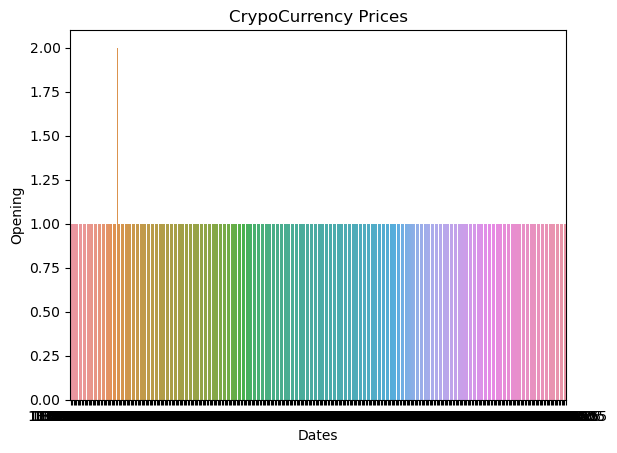

In [25]:
c=df.groupby('Open')['Open'].count()
sns.barplot(x=c.index, y=c.values)
plt.title('CrypoCurrency Prices')
plt.xlabel('Dates')
plt.ylabel('Opening')
plt.show()

<Axes: xlabel='Close'>

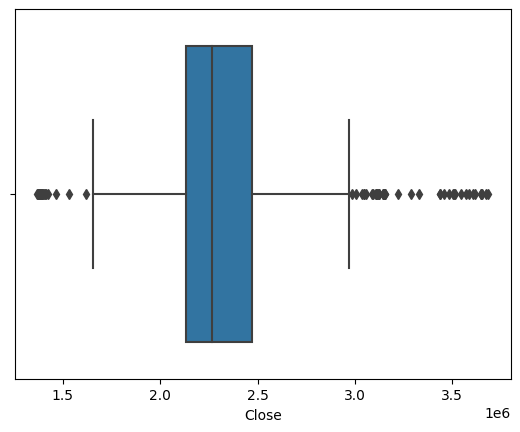

In [42]:
sns.boxplot(df.Close)

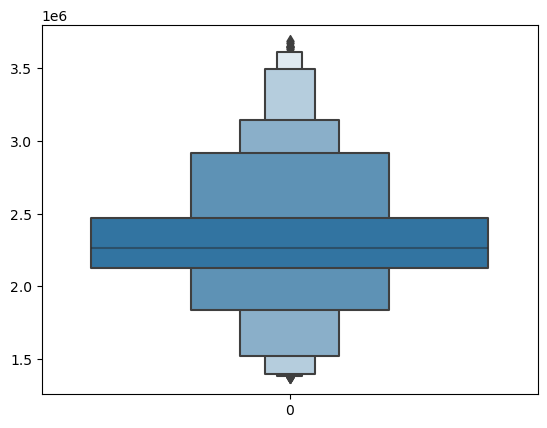

In [20]:
sns.boxenplot(df.Open)
plt.show()

<Axes: ylabel='Open'>

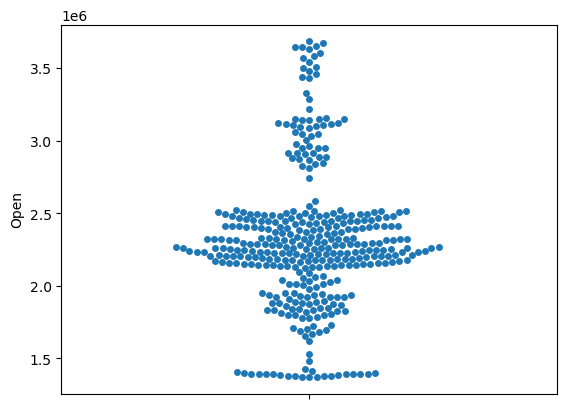

In [27]:
sns.swarmplot(df.Open)

# TIME SERIES - AUTOREGRESSION

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [44]:
df.index = df.index.tz_localize("UTC").tz_convert("Asia/Kolkata")

In [45]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-21 05:30:00+05:30,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
2022-12-22 05:30:00+05:30,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2022-12-23 05:30:00+05:30,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
2022-12-24 05:30:00+05:30,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
2022-12-25 05:30:00+05:30,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772


In [46]:
y=df.drop(columns=['Adj Close','High','Low','Close','Volume'])
y

,Open
Date,
2022-12-21 05:30:00+05:30,1396942.000
2022-12-22 05:30:00+05:30,1393888.000
2022-12-23 05:30:00+05:30,1394759.125
2022-12-24 05:30:00+05:30,1387503.375
2022-12-25 05:30:00+05:30,1391677.250
...,...
2023-12-17 05:30:00+05:30,3482587.500
2023-12-18 05:30:00+05:30,3507364.500
2023-12-19 05:30:00+05:30,3433632.250


In [47]:
y = df["Close"].resample("1D").mean().fillna(method='ffill')
y

Date
2022-12-21 00:00:00+05:30    1393817.875
2022-12-22 00:00:00+05:30    1394817.000
2022-12-23 00:00:00+05:30    1387501.375
2022-12-24 00:00:00+05:30    1391697.875
2022-12-25 00:00:00+05:30    1392458.125
                                ...     
2023-12-17 00:00:00+05:30    3507697.750
2023-12-18 00:00:00+05:30    3434999.500
2023-12-19 00:00:00+05:30    3543232.500
2023-12-20 00:00:00+05:30    3512167.000
2023-12-21 00:00:00+05:30    3613996.250
Freq: D, Name: Close, Length: 366, dtype: float64

ACF and PACF for determining the number of plots

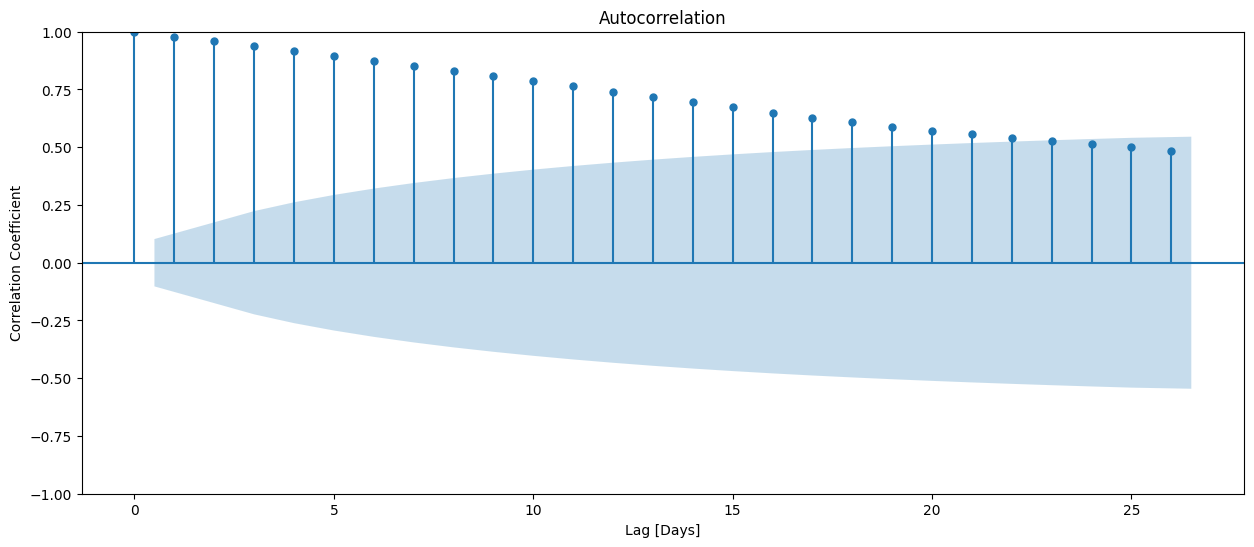

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

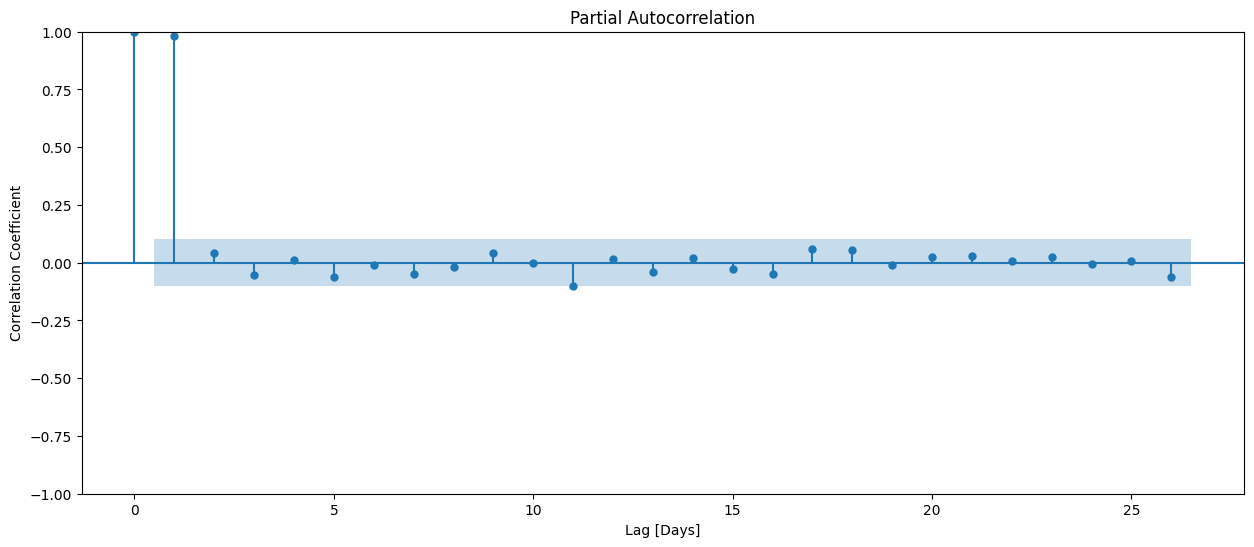

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

Split

In [50]:
cutoff_test = int(len(y)*0.95)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

In [51]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mae_baseline

283241.60160577693

AR Model

In [52]:
model = AutoReg(y_train,lags=3).fit()

In [53]:
y_pred=model.predict().dropna()
y_pred

Date
2022-12-24 00:00:00+05:30    1.399088e+06
2022-12-25 00:00:00+05:30    1.401864e+06
2022-12-26 00:00:00+05:30    1.403874e+06
2022-12-27 00:00:00+05:30    1.413221e+06
2022-12-28 00:00:00+05:30    1.396854e+06
                                 ...     
2023-11-28 00:00:00+05:30    3.123851e+06
2023-11-29 00:00:00+05:30    3.103314e+06
2023-11-30 00:00:00+05:30    3.149120e+06
2023-12-01 00:00:00+05:30    3.158163e+06
2023-12-02 00:00:00+05:30    3.143084e+06
Freq: D, Length: 344, dtype: float64

In [54]:
y_pred.isnull().sum()

0

In [55]:
training_mae = mean_absolute_error(y_train.iloc[3:],y_pred)
training_mae

33596.282409867265

Residuals

In [56]:
y_train_resid=model.resid
y_train_resid

Date
2022-12-24 00:00:00+05:30    -7390.249015
2022-12-25 00:00:00+05:30    -9406.131496
2022-12-26 00:00:00+05:30    -1168.354584
2022-12-27 00:00:00+05:30   -29464.247369
2022-12-28 00:00:00+05:30   -25431.977701
                                 ...     
2023-11-28 00:00:00+05:30   -18241.082023
2023-11-29 00:00:00+05:30    51127.057037
2023-11-30 00:00:00+05:30     5630.221550
2023-12-01 00:00:00+05:30   -14683.183597
2023-12-02 00:00:00+05:30    77779.758359
Freq: D, Length: 344, dtype: float64

<Axes: xlabel='Date', ylabel='Residuals'>

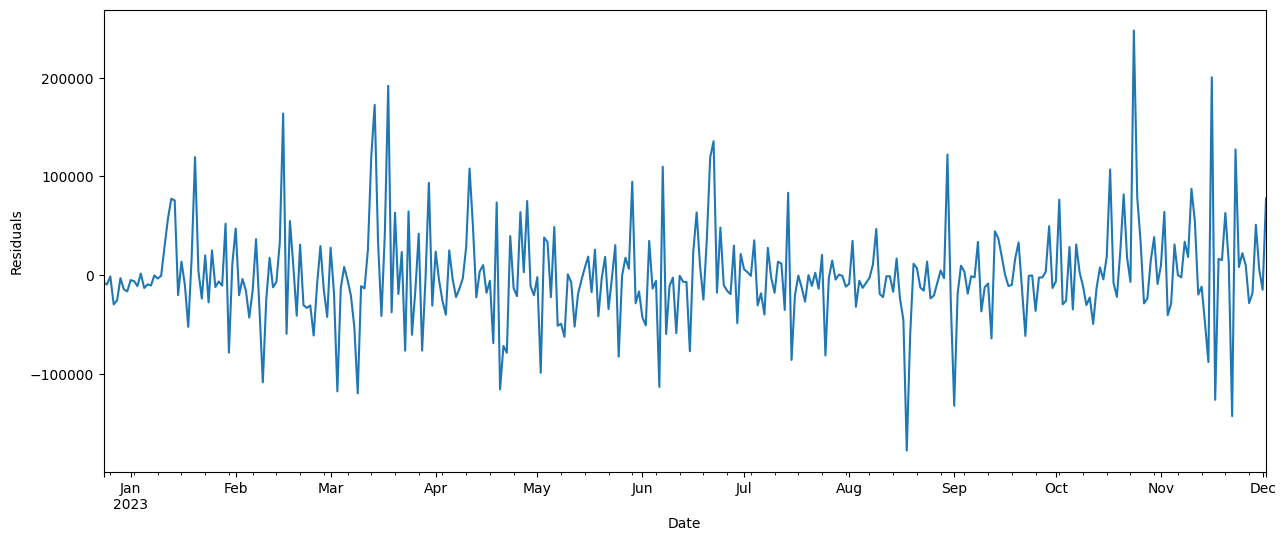

In [57]:
#residuals must be normally distributed
fig,ax = plt.subplots(figsize=(15, 6))
y_train_resid.plot(ylabel="Residuals",ax=ax)

Text(0.5, 1.0, 'Distribution of Residuals')

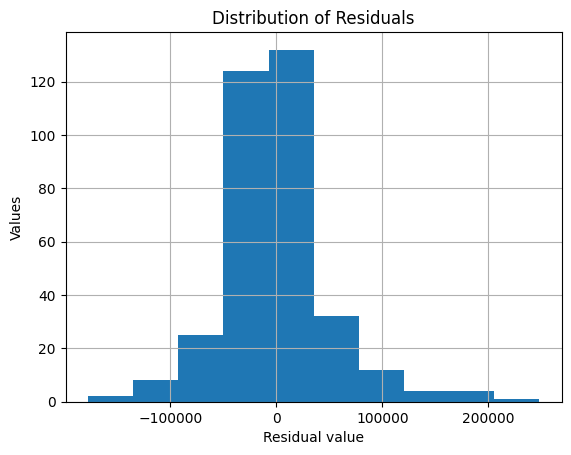

In [58]:
y_train_resid.hist()
plt.xlabel("Residual value")
plt.ylabel("Values")
plt.title("Distribution of Residuals")

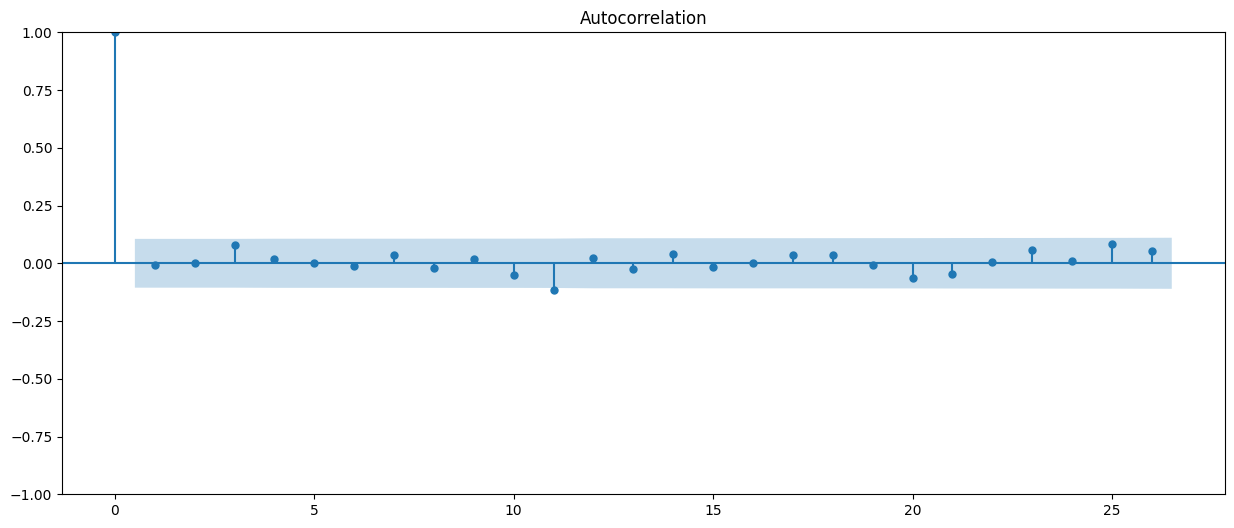

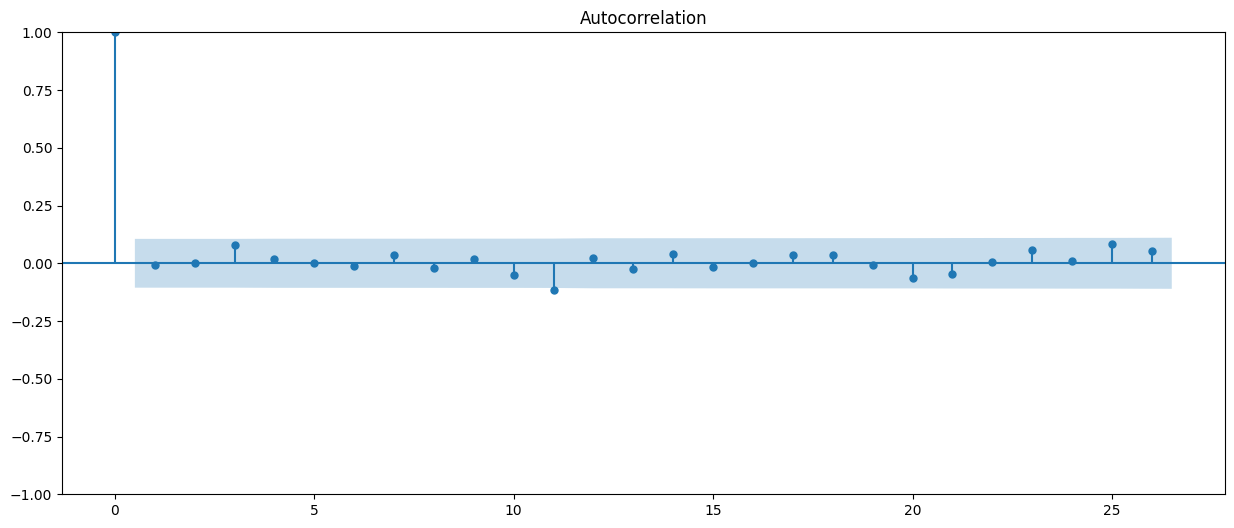

In [59]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid,ax=ax)

In [60]:
y_pred_test = model.predict(y_test.index.min(),y_test.index.max())
test_mae = mean_absolute_error(y_test,y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 328400.2700716642


Walkforward Validation

In [61]:
%%capture

y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model=AutoReg(history,lags=3).fit()
    next_pred=model.forecast()
    y_pred_wfv=y_pred_wfv.append(next_pred)
    history=history.append(y_test[next_pred.index])

In [62]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 78418.65


# ARIMA Model

In [64]:
data=pd.read_csv("BTC-INR.csv")

In [65]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#data.index = data.index.tz_localize("UTC").tz_convert("Asia/Kolkata")

<Axes: xlabel='Date'>

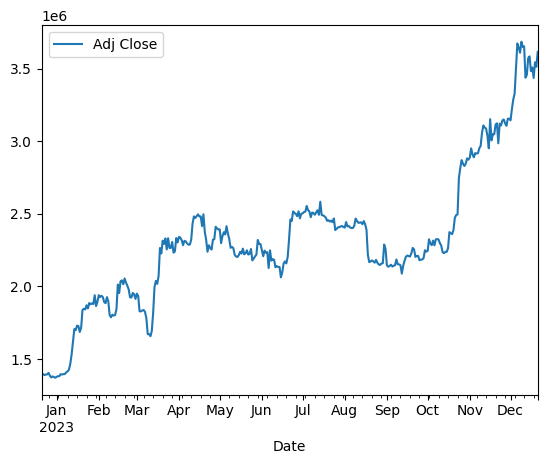

In [66]:
data.plot(y='Adj Close')

In [67]:
data.index = data.index.tz_localize("UTC").tz_convert("Asia/Kolkata")

In [68]:
data.tail(5)
data=data.drop(columns=['Open','High','Low',"Close",'Volume'])

In [69]:
data

,Adj Close
Date,
2022-12-21 05:30:00+05:30,1393817.875
2022-12-22 05:30:00+05:30,1394817.000
2022-12-23 05:30:00+05:30,1387501.375
2022-12-24 05:30:00+05:30,1391697.875
2022-12-25 05:30:00+05:30,1392458.125
...,...
2023-12-17 05:30:00+05:30,3507697.750
2023-12-18 05:30:00+05:30,3434999.500
2023-12-19 05:30:00+05:30,3543232.500


In [70]:
cutoff_test = int(len(data)*0.95)

y_train = data.loc['2022-12-21':'2023-10-31']
y_test = data.loc['2023-11-01':]

In [71]:
y_train

,Adj Close
Date,
2022-12-21 05:30:00+05:30,1393817.875
2022-12-22 05:30:00+05:30,1394817.000
2022-12-23 05:30:00+05:30,1387501.375
2022-12-24 05:30:00+05:30,1391697.875
2022-12-25 05:30:00+05:30,1392458.125
...,...
2023-10-27 05:30:00+05:30,2844666.500
2023-10-28 05:30:00+05:30,2828638.500
2023-10-29 05:30:00+05:30,2843634.750


In [72]:
y_test=y_test['Adj Close']

In [73]:
import time
warnings.filterwarnings("ignore")

In [74]:
p_params = range(0,25,8)
q_params = range(0,3,1)
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train,order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train,y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)



Trained ARIMA (0, 0, 0) in 0.16 seconds.
Trained ARIMA (0, 0, 1) in 0.18 seconds.
Trained ARIMA (0, 0, 2) in 0.15 seconds.
Trained ARIMA (8, 0, 0) in 0.7 seconds.
Trained ARIMA (8, 0, 1) in 1.1 seconds.
Trained ARIMA (8, 0, 2) in 2.51 seconds.
Trained ARIMA (16, 0, 0) in 3.44 seconds.
Trained ARIMA (16, 0, 1) in 1.43 seconds.
Trained ARIMA (16, 0, 2) in 5.45 seconds.
Trained ARIMA (24, 0, 0) in 10.63 seconds.
Trained ARIMA (24, 0, 1) in 8.89 seconds.
Trained ARIMA (24, 0, 2) in 11.3 seconds.

{0: [239216.62380952353, 137376.55925598362, 95689.21664859662], 8: [34428.31070558676, 34435.155057010765, 34424.75223534345], 16: [34878.2162371064, 34922.54379369648, 34647.59152632812], 24: [34768.67320441517, 35018.14411690934, 34656.70578733121]}


In [75]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,239216.6238,34428.3107,34878.2162,34768.6732
1,137376.5593,34435.1551,34922.5438,35018.1441
2,95689.2166,34424.7522,34647.5915,34656.7058


Text(0.5, 1.0, 'ARIMA Grid search')

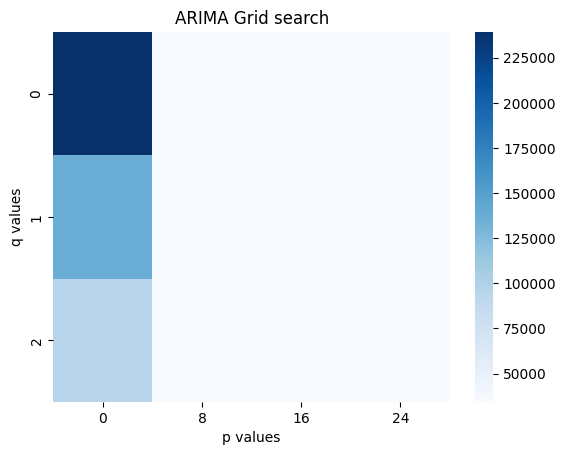

In [76]:
sns.heatmap(mae_df, cmap="Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARIMA Grid search")

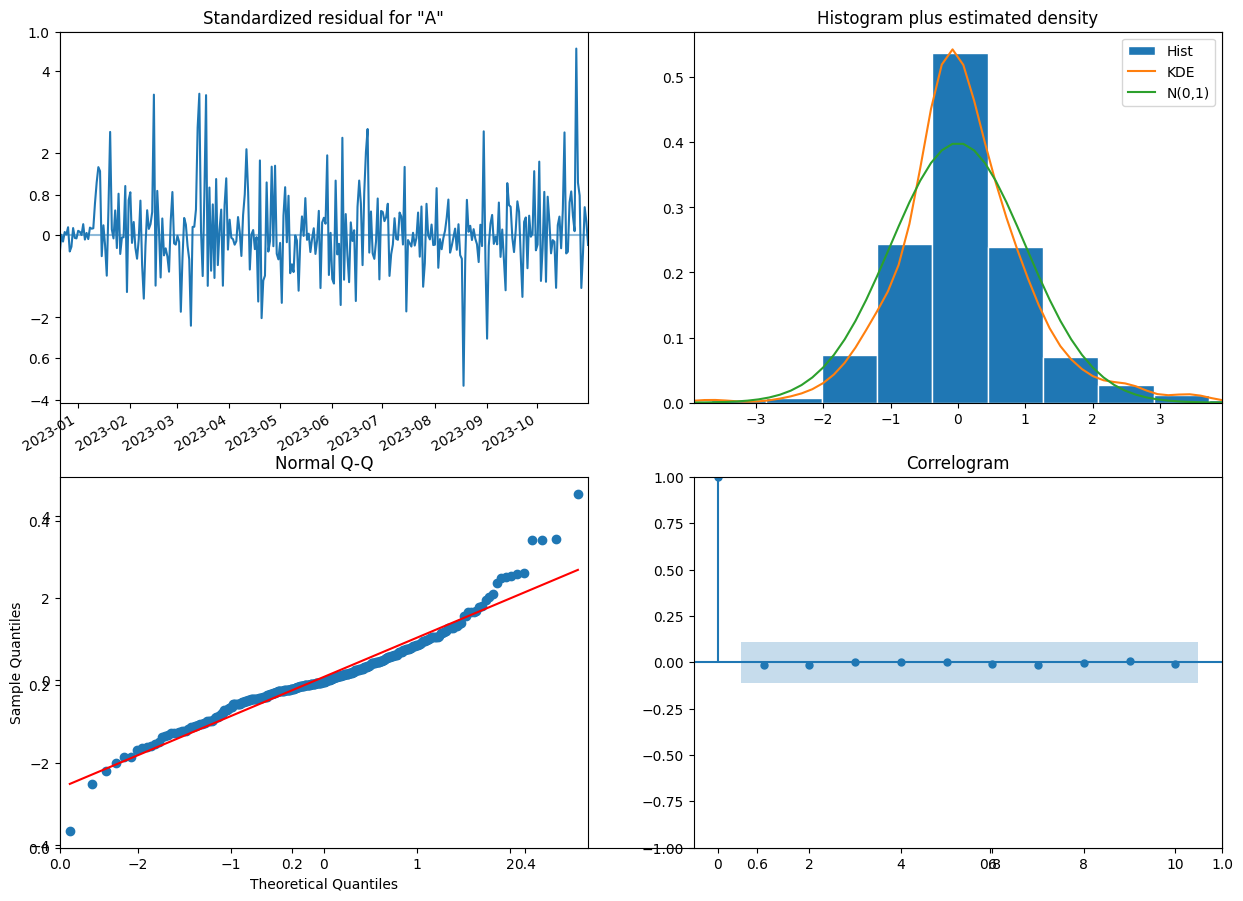

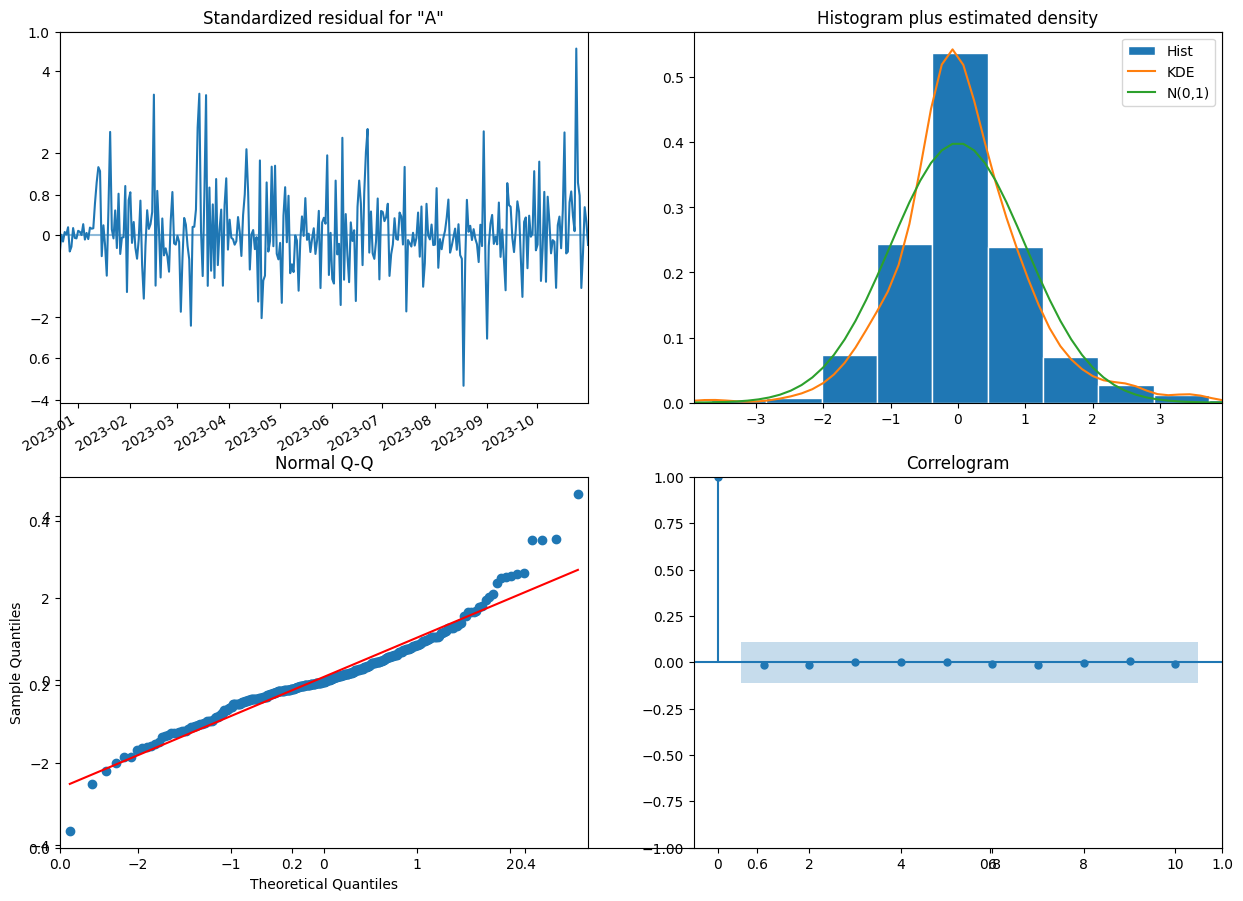

In [77]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

Evaluation

In [83]:
y_pred_wfv = pd.Series(name='series')
history = y_train['Adj Close'].copy() 

for i in range(len(y_test)):
    model = ARIMA(history, order=(8, 0, 1)).fit()
    next_pred = model.forecast()
    next_pred_series = pd.Series(next_pred, index=[y_test.index[i]])
    next_pred_series.name = 'series'  
    y_pred_wfv = y_pred_wfv.append(next_pred_series)
    history = history.append(next_pred_series)


In [79]:
mae_test = mean_absolute_error(y_test, y_pred_wfv)
print(f"MAE on test set: {mae_test}")

MAE on test set: 495704.8321383063


In [81]:
v=model.forecast()
v

2023-12-21 05:30:00+05:30    2.614747e+06
Freq: D, dtype: float64